# Task 3) Neutrino Oscillations

In [1]:
#All relevant libraries and a style sheet for the plots

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
import pandas as pd

plt.style.use('../report.mplstyle')


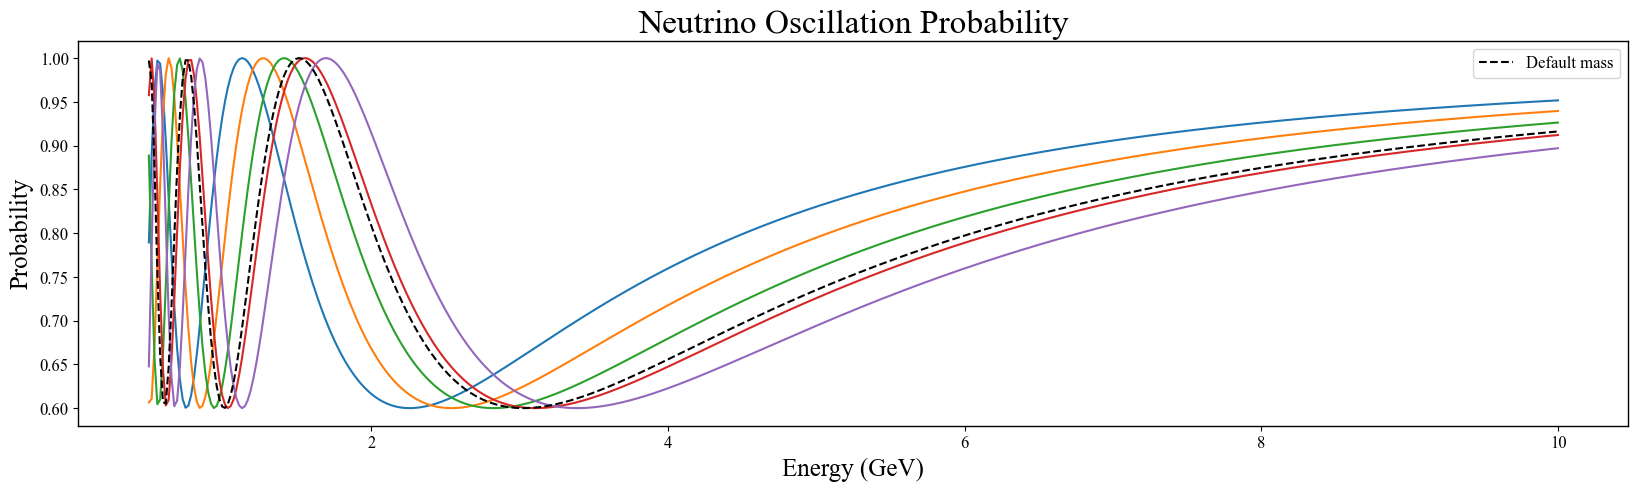

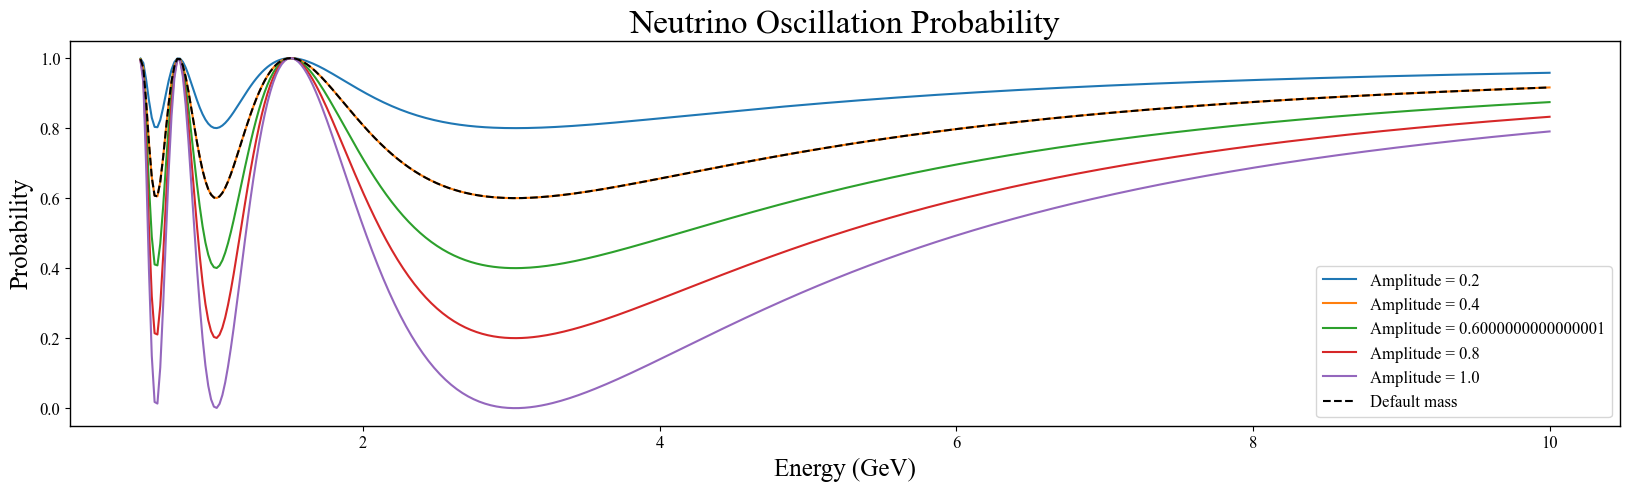

In [2]:
DEFAULT_VAL = {'energy':np.linspace(0.5,10,500),'amp':0.4,'base':1400,'delt_mass':2.68e-3}

def neu_prob(en = DEFAULT_VAL['energy'],amp = DEFAULT_VAL['amp'],base = DEFAULT_VAL['base'],mass = DEFAULT_VAL['delt_mass']):
    return 1- amp*np.sin(1.267*mass*base/en)**2


mass_range = np.linspace(2e-3,3e-3,5)

plt.figure(figsize = (20,5))
for i in range(5):
    plt.plot(DEFAULT_VAL['energy'],neu_prob(mass = mass_range[i]))
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default mass',linestyle = '--',color = 'black')
plt.xlabel('Energy (GeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()

amp_range= np.linspace(2e-1,1,5)

plt.figure(figsize = (20,5))
for i in range(5):
    plt.plot(DEFAULT_VAL['energy'],neu_prob(amp = amp_range[i]),label = 'Amplitude = {}'.format(amp_range[i]))
plt.plot(DEFAULT_VAL['energy'],neu_prob(),label = 'Default mass',linestyle = '--',color = 'black')
plt.xlabel('Energy (GeV)')
plt.ylabel('Probability') 
plt.title('Neutrino Oscillation Probability')
plt.legend()
plt.show()


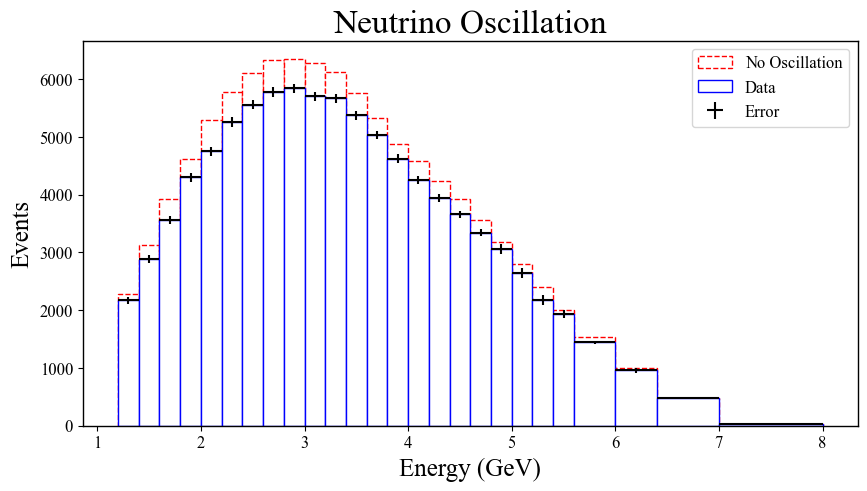

In [3]:
data = np.loadtxt('reno.dat')
data = pd.DataFrame(data,columns = ['e_min','e_max','data','data_err','pred_no_osc'])


e_avg = (data['e_min']+data['e_max'])/2
e_rng = (data['e_max']-data['e_min'])

bin_edges = np.union1d(data['e_min'],data['e_max'])

plt.figure(figsize=(10,5))
plt.hist(e_avg,bins = bin_edges ,weights = data['pred_no_osc'],label = 'No Oscillation',color = 'white',edgecolor = 'red',linestyle = '--')
plt.hist(e_avg,bins = bin_edges ,weights = data['data'],label = 'Data',color = 'white',edgecolor = 'blue')
plt.errorbar(e_avg,data['data'],yerr = data['data_err'], xerr = e_rng/2,fmt = 'none',ecolor = 'black',label = 'Error')
plt.xlabel('Energy (GeV)')
plt.ylabel('Events')
plt.title('Neutrino Oscillation')
plt.legend()
plt.show()


In [4]:


# result = minimize(neu_prob,args = ())
# print(result)

# plt.figure(figsize=(10,5))
# plt.hist(e_avg,bins = bin_edges,weights = data['pred_no_osc'],label = 'No Oscillation',color = 'white',edgecolor = 'red',linestyle = '--')
# plt.hist(e_avg,bins = bin_edges,weights = data['data'],label = 'Data',color = 'white',edgecolor = 'blue')
# plt.errorbar(e_avg,data['data'],yerr = data['data_err'], xerr = e_rng/2,fmt = 'none',ecolor = 'black')
# plt.plot(e_avg,neu_prob(e_avg,amp = result.x[0],base = result.x[1],mass = result.x[2]),label = 'Fit',color = 'black')
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Events')
# plt.title('Neutrino Oscillation')
# plt.legend()
# plt.show()


     fun: 63.88026134165926
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 9
     nit: 5
 success: True
       x: 0.08727018605505904


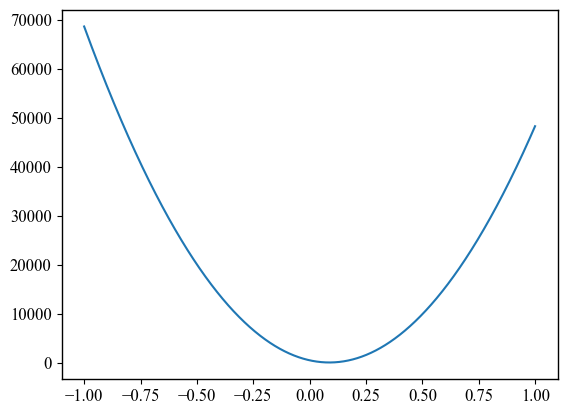

In [5]:
DEFAULT_VAL = {'energy':np.linspace(0.5,10,500),'amp':0.4,'base':1400,'delt_mass':2.68e-3}


pred_no_osc = np.array(data['pred_no_osc'])
data_val = np.array(data['data'])
data_errors = np.array(data['data_err'])
avg_energy = np.array(e_avg)

def modelfunc(energy,non_osc,amp,args = (1400,2.68e-3)):
    base,mass = args
    
    return non_osc*neu_prob(energy,amp,base,mass)



def chi_sq(data,data_err,model):
    chi = 0 


    for i in np.arange(1,26,1):


        chi += ((data[i]-model[i])**2/data_err[i]**2)
    return chi


def chi_wrapper(A):
    return chi_sq(data_val,data_errors,modelfunc(avg_energy,pred_no_osc,A))

result = minimize_scalar(chi_wrapper, args=())

print(result)

theta2 = np.arange(-1,1,0.001)
scan_y = np.zeros_like(theta2)
for i in range(len(theta2)):
    scan_y[i] = chi_wrapper(theta2[i])

plt.plot(theta2,scan_y)
plt.show()

# data = np.full_like(DEFAULT_VAL['energy'],0)
# data_err = np.full_like(DEFAULT_VAL['energy'],0.1)
# np.arange(1,27,1)
# data[0] = 2000
# data_err[0] = 50
        # def model(energy,non_osc,amp,args = (1400,2.68e-3)):
        # base,mass = args

        #     return non_osc*neu_prob(energy,amp,base,mass)


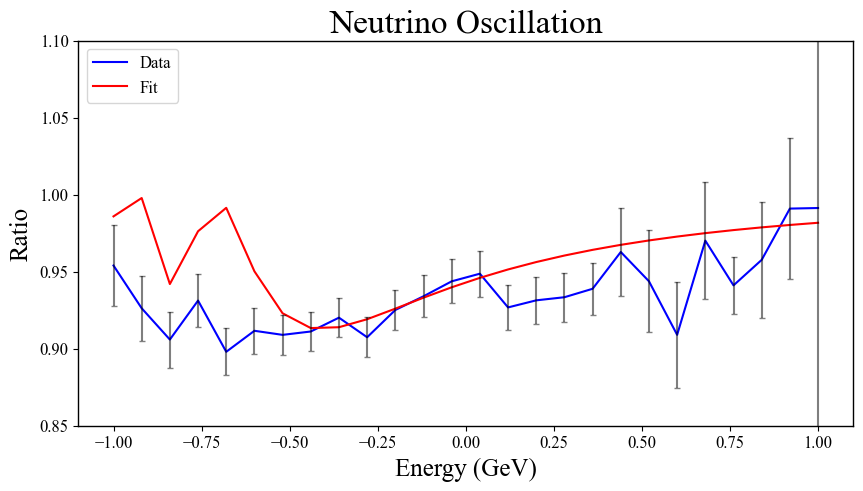

In [6]:
ratio = data_val/pred_no_osc
x_dat = np.linspace(-1,1,26)
ratio_err = ratio*np.sqrt((data_errors/data_val)**2)

plt.figure(figsize=(10,5))
plt.plot(x_dat,ratio,label = 'Data',color = 'blue')
plt.plot(x_dat,neu_prob(en = np.linspace(0.1,10,26),amp = result.x),label = 'Fit',color = 'red')
plt.errorbar(x_dat,ratio,yerr = ratio_err,fmt = 'none',ecolor = 'black',alpha = 0.5,capsize=2)
plt.xlabel('Energy (GeV)')
plt.ylim(0.85,1.1)
plt.ylabel('Ratio')
plt.title('Neutrino Oscillation')
plt.legend()
plt.show()





## Error Propagation



In [7]:
ratio_err = ratio*np.sqrt((data_errors/data_val)**2)

0.0040000000000000036


<function matplotlib.pyplot.show(close=None, block=None)>

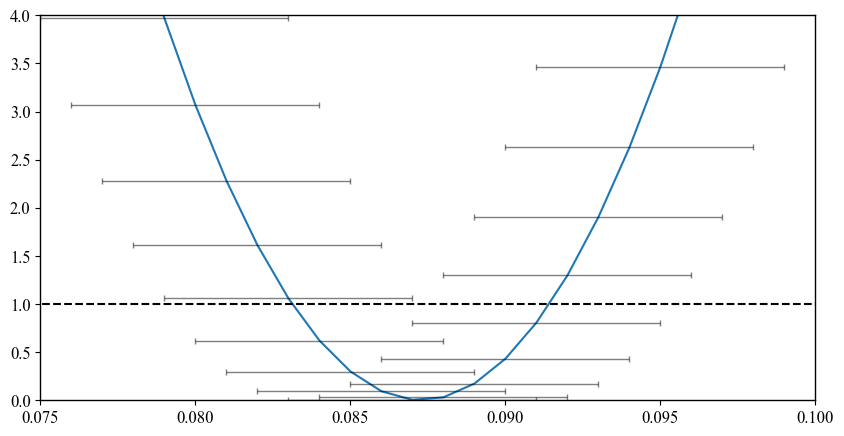

In [8]:


plt.figure(figsize=(10,5))
#print(np.where(scan_y == np.min(scan_y)))
y_val = np.zeros_like(scan_y)

# for i in range(len(scan_y)):
#     res[i] = scan_y[i]-scan_y[np.where(scan_y == np.min(scan_y))]

for i in range(len(scan_y)):
    y_val[i] = scan_y[i]-result.fun
# xllim = theta2[int(np.where(res == np.min(res)))-10]
# xulim = theta2[np.where(res == np.min(res))+10]

# zero = theta2[np.where(np.round(y_val) == 0)]
# index_theta2 = np.where(np.min(y_val)== y_val)

x_val_y_1 = theta2[np.where(np.round(y_val) == 1)]
x_err = (x_val_y_1[2]-x_val_y_1[0])/2
x_errs = np.full_like(theta2,x_err)

print(x_err)


plt.plot(theta2,y_val)
plt.plot(theta2,np.full_like(theta2,1),linestyle = '--',color = 'black')
plt.errorbar(theta2,y_val,xerr = x_errs,fmt = 'none',color = 'black',alpha = 0.5,label = '1$\sigma$',elinewidth = 1,capsize = 2)
plt.ylim(0,4)
plt.xlim(0.075,0.10)
plt.show


